In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import missingno as mso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
orig_df=pd.read_csv("au_and_ela.csv")

<Axes: >

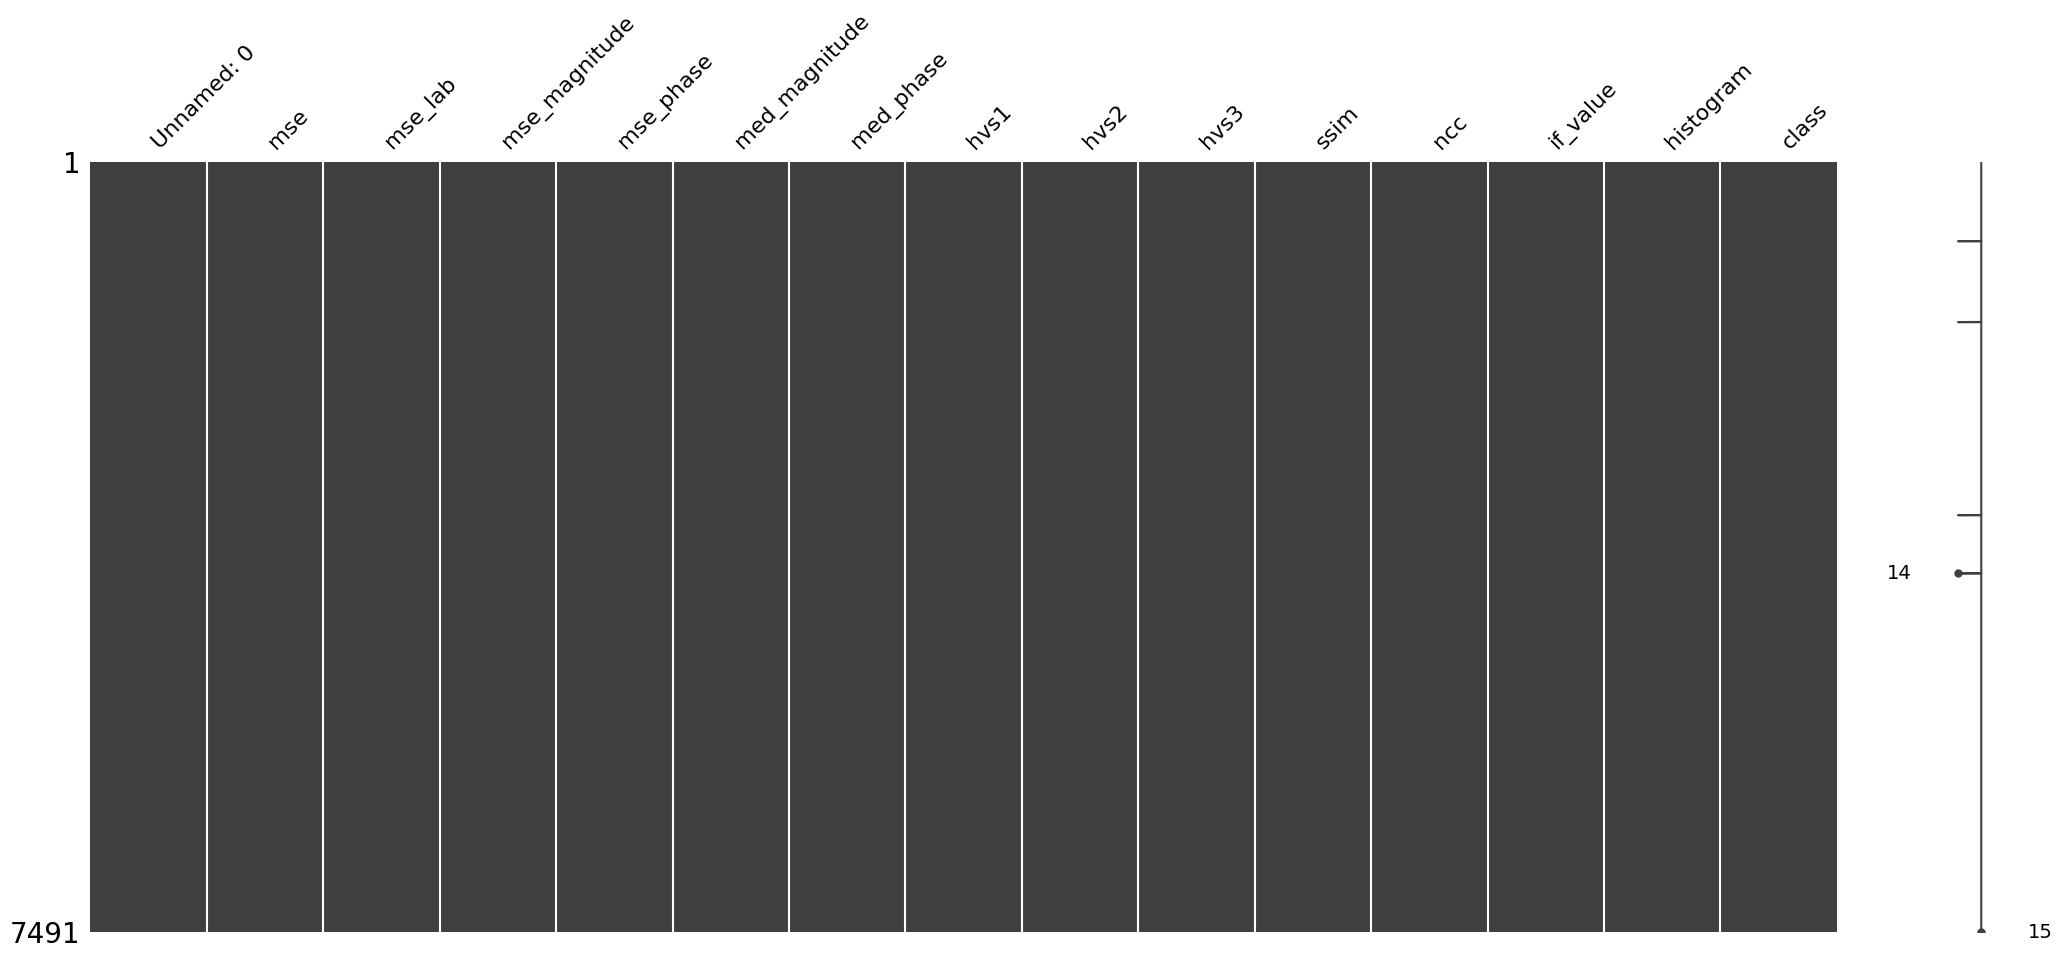

In [3]:
mso.matrix(orig_df)

In [4]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7491 entries, 0 to 7490
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7491 non-null   int64  
 1   mse            7491 non-null   float64
 2   mse_lab        7491 non-null   float64
 3   mse_magnitude  7491 non-null   float64
 4   mse_phase      7491 non-null   float64
 5   med_magnitude  7491 non-null   float64
 6   med_phase      7491 non-null   float64
 7   hvs1           7487 non-null   float64
 8   hvs2           7491 non-null   float64
 9   hvs3           7491 non-null   float64
 10  ssim           7491 non-null   float64
 11  ncc            7491 non-null   float64
 12  if_value       7491 non-null   float64
 13  histogram      7491 non-null   float64
 14  class          7491 non-null   object 
dtypes: float64(13), int64(1), object(1)
memory usage: 878.0+ KB


In [5]:
# Create a new dataframe with only the features we want to use for PCA and clustering (column with numerical - int and float - values)
num_cols=orig_df.select_dtypes(include=['int64','float64'])
df=orig_df[num_cols.columns]
df=df.drop('Unnamed: 0',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7491 entries, 0 to 7490
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mse            7491 non-null   float64
 1   mse_lab        7491 non-null   float64
 2   mse_magnitude  7491 non-null   float64
 3   mse_phase      7491 non-null   float64
 4   med_magnitude  7491 non-null   float64
 5   med_phase      7491 non-null   float64
 6   hvs1           7487 non-null   float64
 7   hvs2           7491 non-null   float64
 8   hvs3           7491 non-null   float64
 9   ssim           7491 non-null   float64
 10  ncc            7491 non-null   float64
 11  if_value       7491 non-null   float64
 12  histogram      7491 non-null   float64
dtypes: float64(13)
memory usage: 760.9 KB


In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace inf values with NaN
df = np.log1p(df) # Handle extremely large values by taking the log of the values
df.dropna(inplace=True) # Drop rows with NaN values

In [7]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

In [8]:
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df.head()

,mse,mse_lab,mse_magnitude,mse_phase,med_magnitude,med_phase,hvs1,hvs2,hvs3,ssim,ncc,if_value,histogram
0,-0.418915,1.057064,-0.431431,-0.905471,-0.665783,-0.612186,-0.413840,0.517346,0.534150,0.369633,0.495446,-0.509746,0.167823
1,0.635803,-0.843717,0.630417,1.024474,-1.203620,-0.612186,-0.385114,-0.680298,1.596152,0.187237,0.696665,0.599535,-0.843721
2,1.142662,2.862974,1.156180,-0.964415,-0.061274,-0.612186,-0.299573,-0.576772,1.309678,0.199935,-0.298764,1.183129,-0.778731
3,0.367825,0.339227,0.344321,0.193585,0.946209,1.362803,-0.156746,-0.026859,0.642743,0.127174,0.051966,0.287830,0.657192
4,1.318582,0.182507,1.341293,1.305275,0.946209,1.913993,0.709666,1.995582,1.410386,-0.364092,-0.197850,1.390497,0.342031


In [9]:
# Applying PCA
pca=PCA(n_components=3)
pca_res=pca.fit_transform(scaled_df)
pca_df=pd.DataFrame(pca_res,columns=['PC1','PC2','PC3',]) # this is reduced dimensional dataframe


In [10]:
# for each principal compnent explained_variance_ratio tell us how much of the important information from the data is contained in that principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio: ", explained_variance_ratio)

Explained variance ratio:  [0.38732954 0.15755428 0.12587153]


In [11]:
px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',color='PC3')

px.scatter(pca_df, x='PC1', y='PC2',color='PC3')

In [12]:
# Performing clustering using KMeans algorithm on pca_df which is a reduced dimensional dataframe
kmeans=KMeans(n_clusters=2,n_init='auto',random_state=42)
cluster=kmeans.fit_predict(pca_df)
pca_df['cluster']=cluster


In [13]:
pca_df

,PC1,PC2,PC3,cluster
0,-1.269102,0.220028,1.191413,0
1,0.251494,0.145845,-0.652888,0
2,1.155350,-1.120183,2.078392,1
3,0.641035,-1.695432,0.470273,1
4,2.944666,-1.408520,0.635768,1
...,...,...,...,...
7481,-0.727167,-2.062290,-0.139379,0
7482,-1.058813,-0.016384,-1.189238,0
7483,2.007148,-0.529057,-0.617311,1
7484,0.159281,0.523791,-1.496034,0


In [14]:
pca_df['cluster'].value_counts()

cluster
0    4561
1    2925
Name: count, dtype: int64

In [15]:
px.scatter(pca_df, x='PC1', y='PC2',color='cluster')

In [16]:
px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',color='cluster')

array([[<Axes: title={'center': 'mse'}>,
        <Axes: title={'center': 'mse_lab'}>,
        <Axes: title={'center': 'mse_magnitude'}>,
        <Axes: title={'center': 'mse_phase'}>],
       [<Axes: title={'center': 'med_magnitude'}>,
        <Axes: title={'center': 'med_phase'}>,
        <Axes: title={'center': 'hvs1'}>,
        <Axes: title={'center': 'hvs2'}>],
       [<Axes: title={'center': 'hvs3'}>,
        <Axes: title={'center': 'ssim'}>,
        <Axes: title={'center': 'ncc'}>,
        <Axes: title={'center': 'if_value'}>],
       [<Axes: title={'center': 'histogram'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

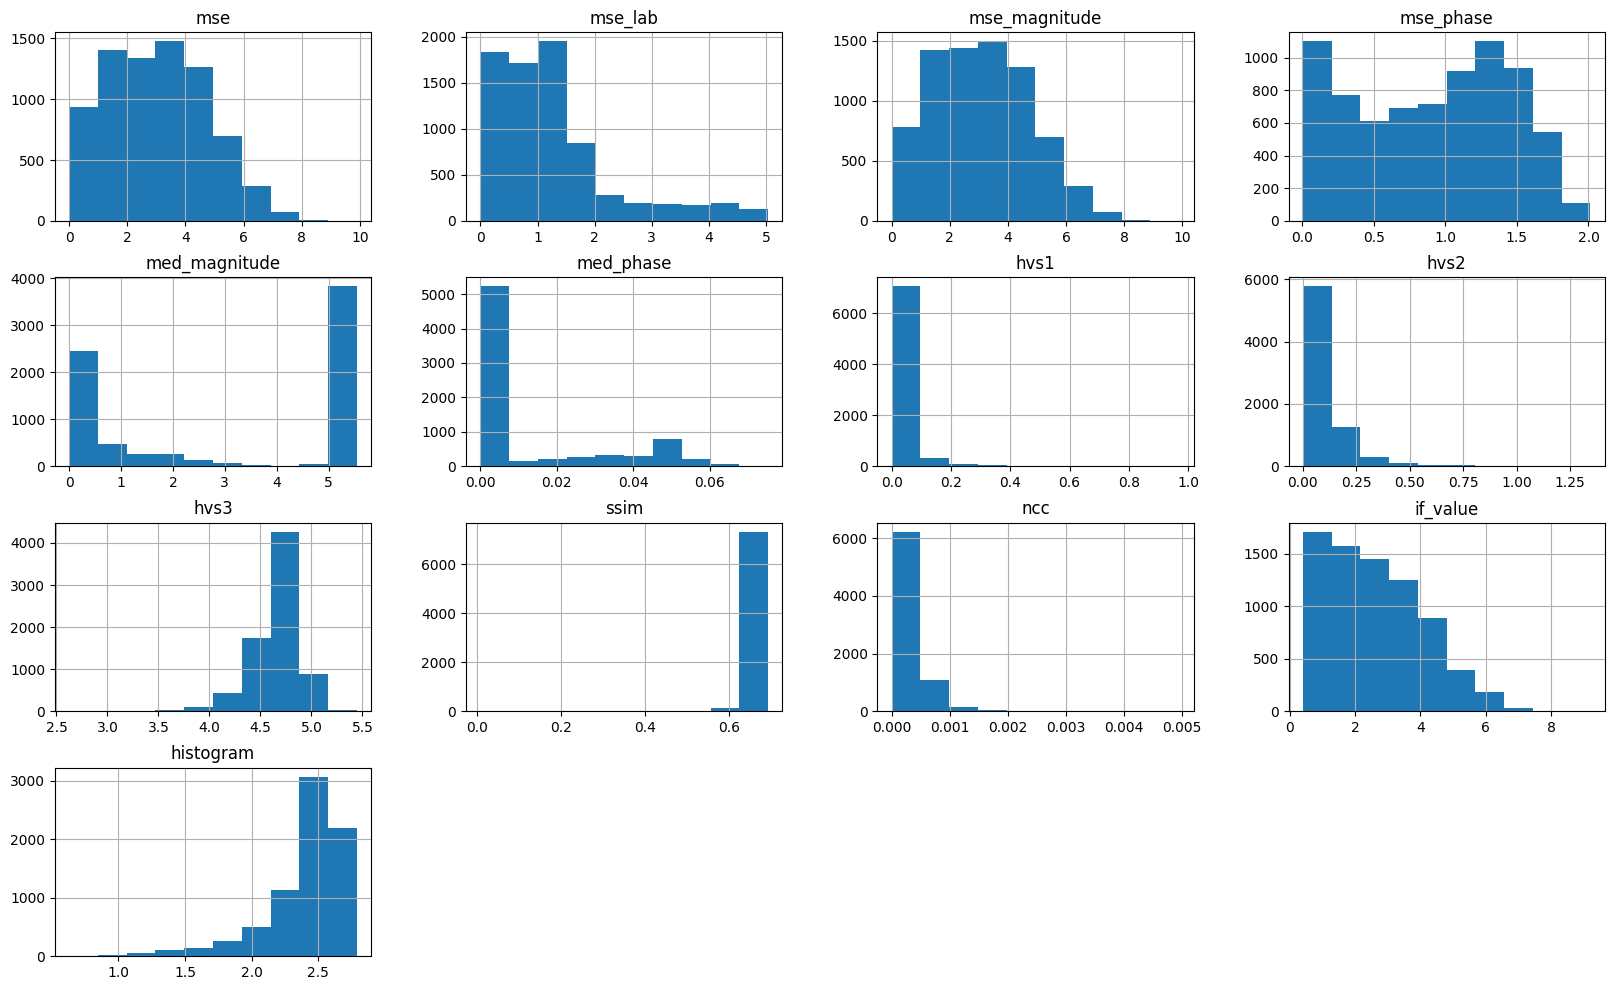

In [17]:
df.hist(figsize=(20, 12))

In [18]:
df

,mse,mse_lab,mse_magnitude,mse_phase,med_magnitude,med_phase,hvs1,hvs2,hvs3,ssim,ncc,if_value,histogram
0,2.302585,2.386694,2.386694,0.429388,1.386294,0.000000e+00,0.010503,0.154849,4.788258,0.691460,0.000496,1.862070,2.447442
1,4.127134,0.325401,4.139003,1.451770,0.000000,0.000000e+00,0.011766,0.022747,5.036208,0.687822,0.000548,3.477071,2.143008
2,5.003946,4.345103,5.006641,0.398163,2.944439,0.000000e+00,0.015525,0.034166,4.969324,0.688076,0.000294,4.326725,2.162567
3,3.663562,1.608239,3.666875,1.011609,5.541264,3.866517e-02,0.021802,0.094822,4.813612,0.686625,0.000383,3.023260,2.594723
4,5.308268,1.438284,5.312123,1.600524,5.541264,4.945603e-02,0.059880,0.317901,4.992836,0.676827,0.000319,4.628632,2.499872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7486,2.197225,0.895964,2.269945,1.030742,5.545177,4.571991e-02,0.013702,0.016059,4.984377,0.691388,0.000304,1.764332,2.459261
7487,2.564949,0.516462,2.603773,1.367005,0.000000,4.288505e-15,0.005062,0.007755,4.924391,0.690278,0.000341,2.048267,2.359778
7488,4.962845,0.856347,4.967317,1.593578,5.541264,0.000000e+00,0.038843,0.105960,4.756785,0.679883,0.000382,4.287817,2.503943
7489,3.496508,0.523459,3.523303,1.508372,0.000000,0.000000e+00,0.027481,0.055176,4.643558,0.686830,0.000236,2.887133,2.437830
